In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

lm_path = f"../language_modeling.csv"
mcp_path = f"../multiple_choice_prompt.csv"
cha_path = f"../channel.csv"
cal_path = f"../calibration.csv"
# cd_path = f"../old_results/cd_two_methods.csv" # old comprehensive results.
cd_path = f"./contrastive_decoding.csv"
cd_best_path = f"./contrastive_decoding_best.csv"
lm_df = pd.read_csv(lm_path)
mcp_df = pd.read_csv(mcp_path)
cha_df = pd.read_csv(cha_path)
cal_df = pd.read_csv(cal_path)
cd_df = pd.read_csv(cd_path)

In [39]:
# drop columns should be a list. Use type hints to enforce this.
def process(df, drop_columns=None):
    # get rid of identical rows 
    df = df.drop_duplicates() # is this really necessary?
    # df = df[df["checkpoint"].str.startswith("google/flan-t5")]
    # remove the seed column and batch_size column
    if isinstance(drop_columns, list):
        drop_columns += ["model_family", "seed", "batch_size", "loading_precision", "sample"]
    else:
        drop_columns = ["model_family", "seed", "batch_size", "loading_precision", "sample"]
    df = df.drop(columns=drop_columns)
    # shorten checkpoint names
    df['checkpoint'] = df["checkpoint"].apply(lambda x: x.split("/")[-1])
    return df
    

In [20]:
lm_df = process(lm_df)
mcp_df = process(mcp_df)
cha_df = process(cha_df)
cal_df = process(cal_df)
cd_df = process(cd_df, ) # drop_columns=["expert_method", "amateur_method", "expert_accuracy", "amateur_accuracy"]
# concatenate all dataframes
pre_df = pd.concat([lm_df, mcp_df, cha_df, cal_df, ]) # cd_df

In [21]:
lm_df.head()

,checkpoint,dataset,method,n_shot,accuracy
0,flan-t5-xl,anli,language_modeling,0,0.41
1,flan-t5-xl,anli,average_language_modeling,0,0.34
2,flan-t5-xl,cqa,language_modeling,0,0.65
3,flan-t5-xl,cqa,average_language_modeling,0,0.53
4,flan-t5-xl,siqa,language_modeling,0,0.56


In [4]:
n_shot = 0 # 4.0, 0
df = pre_df[pre_df["n_shot"] == n_shot]

In [37]:
# select tows with highest accuracy
groups = cd_df.sort_values(by="accuracy", ascending=False).groupby('dataset')
max_rows = groups['accuracy'].idxmax()
best_df = cd_df.loc[max_rows]
# save to csv
best_df.to_csv(f"contrastive_decoding_best.csv", index=False)

In [11]:
vis_df.head()

,checkpoint,amateur_checkpoint,dataset,amateur_method,expert_accuracy,accuracy
180,pythia-2.8b,EleutherAI/pythia-70m,copa,language_modeling,0.55,0.59
181,pythia-2.8b,EleutherAI/pythia-70m,cqa,language_modeling,0.23,0.20
182,pythia-2.8b,EleutherAI/pythia-70m,obqa,language_modeling,0.30,0.30
183,pythia-2.8b,EleutherAI/pythia-70m,piqa,language_modeling,0.47,0.46
184,pythia-2.8b,EleutherAI/pythia-70m,qasc,language_modeling,0.11,0.12
...,...,...,...,...,...,...
1181,pythia-2.8b,EleutherAI/pythia-70m,disambiguation_qa,multiple_choice_prompt,0.39,0.28
1182,pythia-2.8b,EleutherAI/pythia-70m,conceptual_combinations,multiple_choice_prompt,0.00,0.00
1183,pythia-2.8b,EleutherAI/pythia-70m,date_understanding,multiple_choice_prompt,0.00,0.00
1184,pythia-2.8b,EleutherAI/pythia-70m,emoji_movie,multiple_choice_prompt,0.11,0.00


IndexError: index 0 is out of bounds for axis 0 with size 0

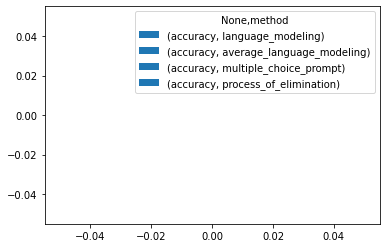

In [6]:
models = ["facebook/opt-iml-1.3b", "facebook/opt-iml-max-1.3b", "google/flan-t5-large", "google/flan-t5-xl"]
method_index = [('accuracy', 'language_modeling'), ('accuracy', 'average_language_modeling'), ('accuracy',    'multiple_choice_prompt'), ('accuracy',    'process_of_elimination')]
anli_df = df[(df["dataset"] == "anli") & (df["checkpoint"].isin(models))]

anli_df = anli_df.groupby(["checkpoint","method"])
anli_means = anli_df.mean().unstack().reindex(method_index, axis="columns")
anli_errors = anli_df.std().unstack().reindex(method_index, axis="columns")

fig, ax = plt.subplots()

anli_means.plot.bar(yerr=anli_errors, ax=ax, capsize=4, rot=0)
# plot horizontal lines corresponding to y labels
# for y in [0.4, 0.5]:
#     ax.axhline(y, color="black", linestyle="--", alpha=0.5)


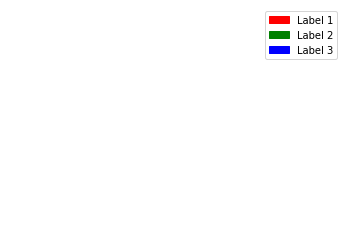

In [140]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create custom legend handles and labels
handles = [
    mpatches.Patch(color='red', label='Red'),
    mpatches.Patch(color='green', label='Green'),
    mpatches.Patch(color='blue', label='Blue')
]
labels = ['Label 1', 'Label 2', 'Label 3']

# Create the legend
plt.legend(handles=handles, labels=labels)

# Hide the axis labels
plt.axis('off')

# Show the plot
plt.show()
